In [1]:
%load_ext autoreload

In [2]:
%autoreload 

import os
import sys
sys.path.append('../../..')
import numpy as np
from tqdm import tqdm_notebook as tqdm
from scipy.interpolate import interp1d, interp2d

import config
import main
import pickle
import darkhistory.physics as phys
from plotting_utils import plot_distortion, download_plot

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
%matplotlib inline

In [3]:
### SETTINGS TO CHANGE
output_dir = '/Users/viviesque/OneDrive - Massachusetts Institute of Technology/DarkHistory/output/'
fig_dir = '/Users/viviesque/OneDrive - Massachusetts Institute of Technology/DarkHistory/figs/'
# output_dir = '/scratch/gpfs/hongwanl/DarkHistory/full_distortion/'
# fig_dir    = '/scratch/gpfs/hongwanl/DarkHistory/full_distortion/figs/'

In [4]:
### Parameters
model = 'elec_decay'
log10mDM = 6.2422

### Load data
dir_str = '/Users/viviesque/Dropbox (MIT)/DarkHistory_V2/data/WQ_nmax_200_runs/'
filename = 'elec_decay_log10mDM_06.2422_nmax_200_Puchwein.p'
data = pickle.load(open(dir_str+filename, 'rb'))

# Plot distortions from $\Lambda$CDM, as well as largest distortion from DM injection

In [5]:
### Get LCDM contributions

# damping mu
dist_prim = {'distortion' : phys.ymu_distortion(data['data'][-1]['distortion'].eng, 2e-8, 1, 'mu')}
# Recombination
dist_recomb = download_plot('/BB_plus_BF_dist', input_dir=config.data_path)
# Reionization
dist_reion = {'distortion' : phys.ymu_distortion(data['data'][-1]['distortion'].eng, 2e-6, 1, 'y')}
# Relativistic correction to SZ
dist_rSZ = np.array([
    [5.036942072763555, 3.6163518375575415e-28],
    [9.143659915931128, 1.209781020688894e-27],
    [15.998836991462888, 3.7437623351850656e-27],
    [27.181220544667923, 1.1142752423453172e-26],
    [46.52072209383389, 3.448212206987804e-26],
    [69.7394960623889, 8.12408457786294e-26],
    [84.44998090601, 1.1993539462092208e-25],
    [97.12737307636237, 1.5753186734235104e-25],
    [111.70785948684002, 1.9140570900630587e-25],
    [124.74926899295365, 2.069138081114765e-25],
    [136.27036930573956, 2.069138081114765e-25],
    [145.6042328523307, 1.9900875394005128e-25],
    [159.0513735546357, 1.7029543549113224e-25],
    [169.94562609992715, 1.1993539462092208e-25],
    [177.6199335876047, 7.813707376518021e-26],
    [182.92771569412622, 4.356099030694581e-26],
    [187.01238420529864, 1.6449981487288365e-26],
    [188.39410922629824, 4.729465154842259e-27],
    [188.39410922629824, 1.2578361153255278e-27],
    [189.7860430045508, -9.913810232584609e-27],
    [194.02385393866302, -3.585182585180411e-26],
    [201.29819774868685, -1.0263091373318927e-25],
    [210.38830675408363, -1.840931351755651e-25],
    [224.79889180676753, -3.1759941897679083e-25],
    [245.55998005695307, -5.068590649272638e-25],
    [266.2711175043519, -6.657455476738892e-25],
    [284.5094057679419, -7.779961424193058e-25],
    [301.7673466233939, -8.410310505352536e-25],
    [332.0722766596216, -8.410310505352536e-25],
    [365.42057369621233, -6.92190387483964e-25],
    [399.1686438844845, -4.688702004672792e-25],
    [423.3816530428815, -2.7177563949109377e-25],
    [442.50047983858724, -1.1993539462092208e-25],
    [449.0633893207221, -6.185194819421769e-26],
    [452.3812558014689, -3.448212206987804e-26],
    [455.72363605520604, -8.820408961149737e-27],
    [462.48266369149445, 3.585182585180411e-26],
    [469.3419372904091, 8.12408457786294e-26],
    [479.8220672420037, 1.6378937069540545e-25],
    [501.4895980157768, 2.7177563949109377e-25],
    [531.9092525042456, 4.171581683321643e-25],
    [572.5416225773251, 5.068590649272638e-25],
    [611.7579643771389, 5.479258682742214e-25],
    [683.1780611251983, 4.874947295931556e-25],
    [746.2723224163212, 3.569698846826048e-25],
    [827.2840710780952, 2.23678406508673e-25],
    [910.3639210838553, 1.1993539462092208e-25],
    [979.906316837469, 6.686332506183351e-26],
    [1047.025176912492, 3.585182585180411e-26],
    [1118.741355425373, 1.7782794100389083e-26],
    [1186.602634360478, 8.820408961149737e-27],
    [1277.2468131222327, 3.4631689912697316e-27],
    [1374.815270412849, 1.209781020688894e-27],
    [1479.8369495555535, 3.6163518375575415e-28],
    [1581.198648571463, 1.0810221345313149e-28]
])

../../../darkhistory/physics.py:2034: RuntimeWarning: overflow encountered in exp
  *(x / 2.19 - 1.)
../../../darkhistory/physics.py:2034: RuntimeWarning: overflow encountered in square
  *(x / 2.19 - 1.)
../../../darkhistory/physics.py:2034: RuntimeWarning: invalid value encountered in true_divide
  *(x / 2.19 - 1.)


In [6]:
print(data['DM_params'])

{'pri': 'elec', 'DM_process': 'decay', 'mDM': 1746775.5464866608, 'inj_param': 2.0192269772200676e+24}


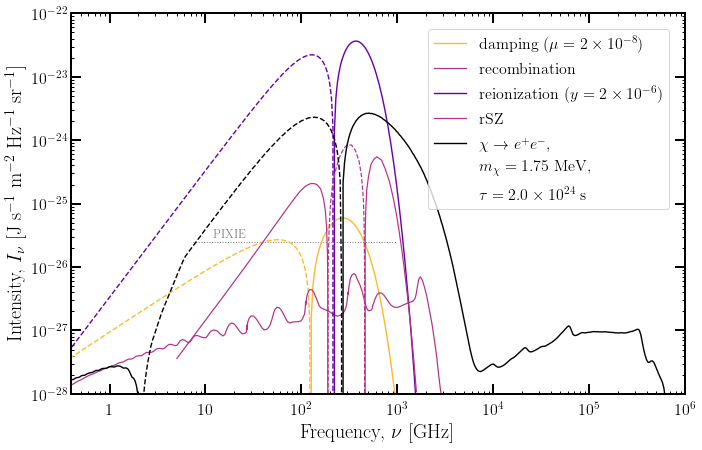

In [8]:
cmap = cm.plasma(np.linspace(0.2,0.85,4))

plt.figure(figsize=(11,7))
ax = plt.gca()

plot_distortion(ax, dist_prim, label=r'damping ($\mu=2 \times 10^{-8}$)',
                color=cmap[3], leg=True, first=False)
plt.plot(dist_recomb[:,0], dist_recomb[:,1], label='recombination',
         color=cmap[1], linewidth=1.2)
plot_distortion(ax, dist_reion, label=r'reionization ($y=2 \times 10^{-6}$)',
                color=cmap[0], leg=True, first=False)
plt.plot(dist_rSZ[:,0], dist_rSZ[:,1], label='rSZ',
         color=cmap[1], linewidth=1.2)
plt.plot(dist_rSZ[:,0], -dist_rSZ[:,1],
         color=cmap[1], linestyle='--', linewidth=1.2)

plot_distortion(ax, data['data'][-1], 
                label=r"$\chi \rightarrow e^+ e^-,$", 
                color='k', leg=True, first=False)
plt.plot([1,10],[1,10], alpha=0, 
         label=fr"$m_\chi = {data['DM_params']['mDM']/1e6:.2f}$ MeV,")
plt.plot([1,10],[1,10], alpha=0, 
         label=r"$\tau = 2.0 \times 10^{24}$ s")

plt.hlines(2.5e-26, 7.5, 1000, color='gray', linestyle=':', linewidth=1)
plt.text(0.23, 0.41, 'PIXIE', color='grey', fontsize=12, transform = ax.transAxes)

plt.ylim(1e-28, 1e-22)
plt.legend()

plt.savefig(fig_dir+'LCDM_distortions.pdf')
plt.show()